<a href="https://colab.research.google.com/github/nehasha1/Horticulture_crops/blob/main/All(FAO).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

Mean Absolute Error (MAE): 828.97
Root Mean Squared Error (RMSE): 1156.73
Mean Absolute Percentage Error (MAPE): 8.93%


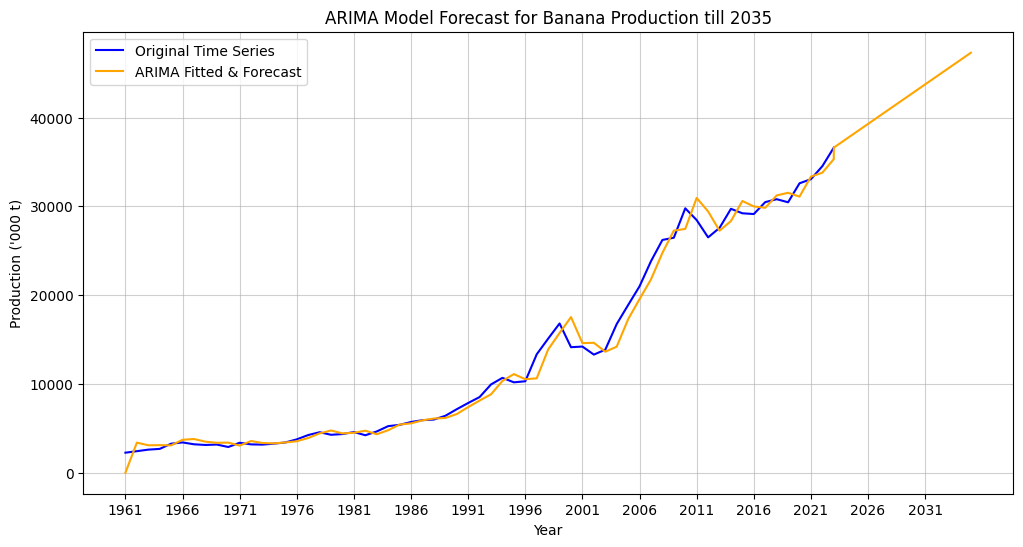

    Year  Forecasted Production
63  2024           37504.908409
64  2025           38395.816818
65  2026           39286.725227
66  2027           40177.633636
67  2028           41068.542045
68  2029           41959.450454
69  2030           42850.358863
70  2031           43741.267272
71  2032           44632.175681
72  2033           45523.084091
73  2034           46413.992500
74  2035           47304.900909


In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the dataset (adjust the file path as needed)
file_path = '/content/Banana .csv'
data = pd.read_csv(file_path)

data = data.sort_values('Year')  # Ensure the data is sorted by year
data.set_index('Year', inplace=True)

# Select the production column
time_series = data["Quantity(in '000 t)"]

# Fit an ARIMA model
arima_model = ARIMA(time_series, order=(0, 2, 1))
arima_result = arima_model.fit()

# Forecast up to 2035
start_year = 2024
future_years = list(range(start_year, 2036))  # Forecast years from 2024 to 2035
forecast = arima_result.forecast(steps=len(future_years))  # Predict future values

# Ensure continuous connection by including only the last fitted value
last_actual_year = time_series.index[-1]
all_years = list(time_series.index) + [last_actual_year] + future_years
all_values = list(arima_result.fittedvalues) + [time_series.iloc[-1]] + list(forecast)

# Ensure x and y are the same length
if len(all_years) > len(all_values):
    all_years = all_years[:len(all_values)]
elif len(all_values) > len(all_years):
    all_values = all_values[:len(all_years)]
# Plot the original series, fitted values, and forecast
# Plot the original series, fitted values, and forecast with 10-year gaps
# Plot the original series, fitted values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Original Time Series', color='blue')
plt.plot(all_years, all_values, label='ARIMA Fitted & Forecast', linestyle='-', color='orange')

# Customizing the x-axis
plt.xticks(
    ticks=range(time_series.index.min(), 2036, 5),  # Tick every 10 years
    labels=range(time_series.index.min(), 2036, 5),
)
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Get the actual values and fitted values
actual = time_series  # Actual historical values
fitted = arima_result.fittedvalues  # Fitted values from ARIMA

# Calculate error metrics
mae = mean_absolute_error(actual, fitted)
rmse = np.sqrt(mean_squared_error(actual, fitted))
mape = np.mean(np.abs((actual - fitted) / actual)) * 100  # MAPE

# Print error values
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


plt.title('ARIMA Model Forecast for Banana Production till 2035')
plt.xlabel('Year')
plt.ylabel('Production (\'000 t)')
plt.legend()
plt.grid(True, linestyle='-', alpha=0.6)
plt.show()

# Print forecast values
forecast_df = pd.DataFrame({'Year': future_years, 'Forecasted Production': forecast})
print(forecast_df)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as s

Mean Absolute Error (MAE): 160.38
Root Mean Squared Error (RMSE): 256.29
Mean Absolute Percentage Error (MAPE): 15.06%


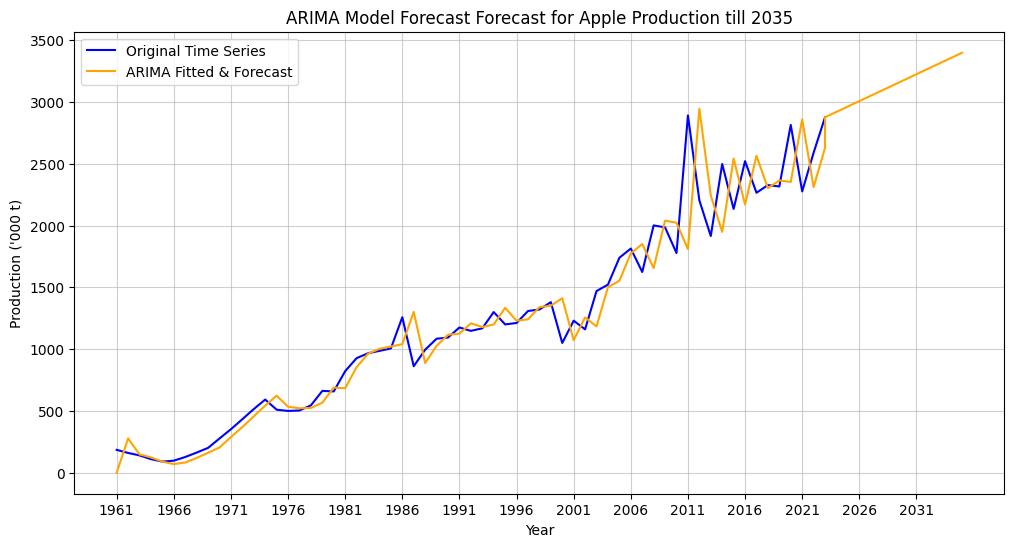

    Year  Forecasted Production
63  2024            2919.509242
64  2025            2963.018484
65  2026            3006.527725
66  2027            3050.036967
67  2028            3093.546209
68  2029            3137.055451
69  2030            3180.564693
70  2031            3224.073934
71  2032            3267.583176
72  2033            3311.092418
73  2034            3354.601660
74  2035            3398.110902


In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the dataset (adjust the file path as needed)
file_path = '/content/Apple.csv'
data = pd.read_csv(file_path)

data = data.sort_values('Year')  # Ensure the data is sorted by year
data.set_index('Year', inplace=True)

# Select the production column
time_series = data["Quantity(in '000t)"]

# Fit an ARIMA model
arima_model = ARIMA(time_series, order=(0, 2, 1))
arima_result = arima_model.fit()

# Forecast up to 2035
start_year = 2024
future_years = list(range(start_year, 2036))  # Forecast years from 2024 to 2035
forecast = arima_result.forecast(steps=len(future_years))  # Predict future values

# Ensure continuous connection by including only the last fitted value
last_actual_year = time_series.index[-1]
all_years = list(time_series.index) + [last_actual_year] + future_years
all_values = list(arima_result.fittedvalues) + [time_series.iloc[-1]] + list(forecast)

# Ensure x and y are the same length
if len(all_years) > len(all_values):
    all_years = all_years[:len(all_values)]
elif len(all_values) > len(all_years):
    all_values = all_values[:len(all_years)]
# Plot the original series, fitted values, and forecast
# Plot the original series, fitted values, and forecast with 10-year gaps
# Plot the original series, fitted values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Original Time Series', color='blue')
plt.plot(all_years, all_values, label='ARIMA Fitted & Forecast', linestyle='-', color='orange')

# Customizing the x-axis
plt.xticks(
    ticks=range(time_series.index.min(), 2036, 5),  # Tick every 10 years
    labels=range(time_series.index.min(), 2036, 5),
)
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Get the actual values and fitted values
actual = time_series  # Actual historical values
fitted = arima_result.fittedvalues  # Fitted values from ARIMA

# Calculate error metrics
mae = mean_absolute_error(actual, fitted)
rmse = np.sqrt(mean_squared_error(actual, fitted))
mape = np.mean(np.abs((actual - fitted) / actual)) * 100  # MAPE

# Print error values
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


plt.title('ARIMA Model Forecast Forecast for Apple Production till 2035')
plt.xlabel('Year')
plt.ylabel('Production (\'000 t)')
plt.legend()
plt.grid(True, linestyle='-', alpha=0.6)
plt.show()

# Print forecast values
forecast_df = pd.DataFrame({'Year': future_years, 'Forecasted Production': forecast})
print(forecast_df)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

Mean Absolute Error (MAE): 192.64
Root Mean Squared Error (RMSE): 298.40
Mean Absolute Percentage Error (MAPE): 16.56%


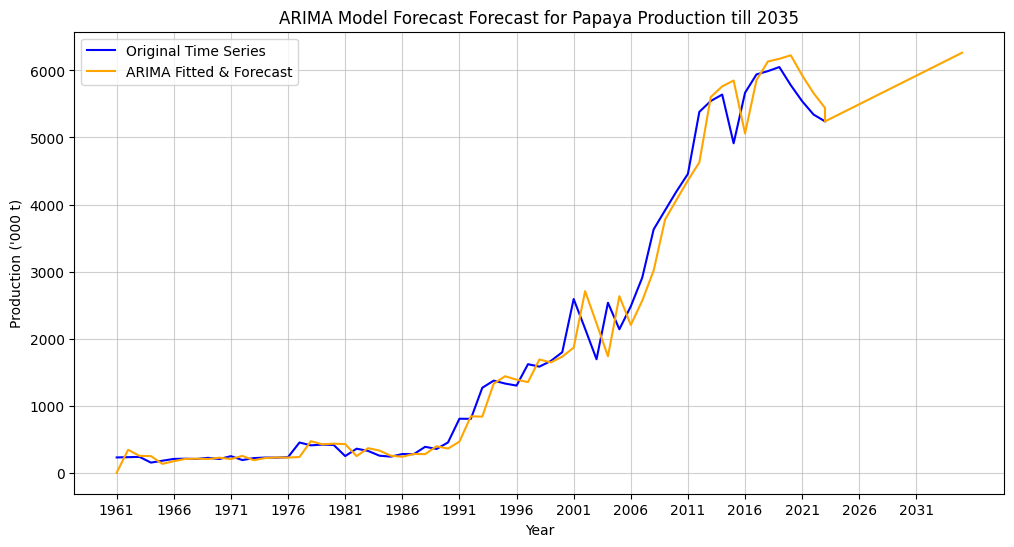

    Year  Forecasted Production
63  2024            5325.302896
64  2025            5410.605791
65  2026            5495.908687
66  2027            5581.211583
67  2028            5666.514478
68  2029            5751.817374
69  2030            5837.120269
70  2031            5922.423165
71  2032            6007.726061
72  2033            6093.028956
73  2034            6178.331852
74  2035            6263.634748


In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the dataset (adjust the file path as needed)
file_path = '/content/Papaya.csv'
data = pd.read_csv(file_path)

data = data.sort_values('Year')  # Ensure the data is sorted by year
data.set_index('Year', inplace=True)

# Select the production column
time_series = data["Quantity(in '000t)"]

# Fit an ARIMA model
arima_model = ARIMA(time_series, order=(0, 2, 1))
arima_result = arima_model.fit()

# Forecast up to 2035
start_year = 2024
future_years = list(range(start_year, 2036))  # Forecast years from 2024 to 2035
forecast = arima_result.forecast(steps=len(future_years))  # Predict future values

# Ensure continuous connection by including only the last fitted value
last_actual_year = time_series.index[-1]
all_years = list(time_series.index) + [last_actual_year] + future_years
all_values = list(arima_result.fittedvalues) + [time_series.iloc[-1]] + list(forecast)

# Ensure x and y are the same length
if len(all_years) > len(all_values):
    all_years = all_years[:len(all_values)]
elif len(all_values) > len(all_years):
    all_values = all_values[:len(all_years)]
# Plot the original series, fitted values, and forecast
# Plot the original series, fitted values, and forecast with 10-year gaps
# Plot the original series, fitted values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Original Time Series', color='blue')
plt.plot(all_years, all_values, label='ARIMA Fitted & Forecast', linestyle='-', color='orange')

# Customizing the x-axis
plt.xticks(
    ticks=range(time_series.index.min(), 2036, 5),  # Tick every 10 years
    labels=range(time_series.index.min(), 2036, 5),
)

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Get the actual values and fitted values
actual = time_series  # Actual historical values
fitted = arima_result.fittedvalues  # Fitted values from ARIMA

# Calculate error metrics
mae = mean_absolute_error(actual, fitted)
rmse = np.sqrt(mean_squared_error(actual, fitted))
mape = np.mean(np.abs((actual - fitted) / actual)) * 100  # MAPE

# Print error values
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

plt.title('ARIMA Model Forecast Forecast for Papaya Production till 2035')
plt.xlabel('Year')
plt.ylabel('Production (\'000 t)')
plt.legend()
plt.grid(True, linestyle='-', alpha=0.6)
plt.show()

# Print forecast values
forecast_df = pd.DataFrame({'Year': future_years, 'Forecasted Production': forecast})
print(forecast_df)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

Mean Absolute Error (MAE): 86.25
Root Mean Squared Error (RMSE): 201.77
Mean Absolute Percentage Error (MAPE): 11.96%


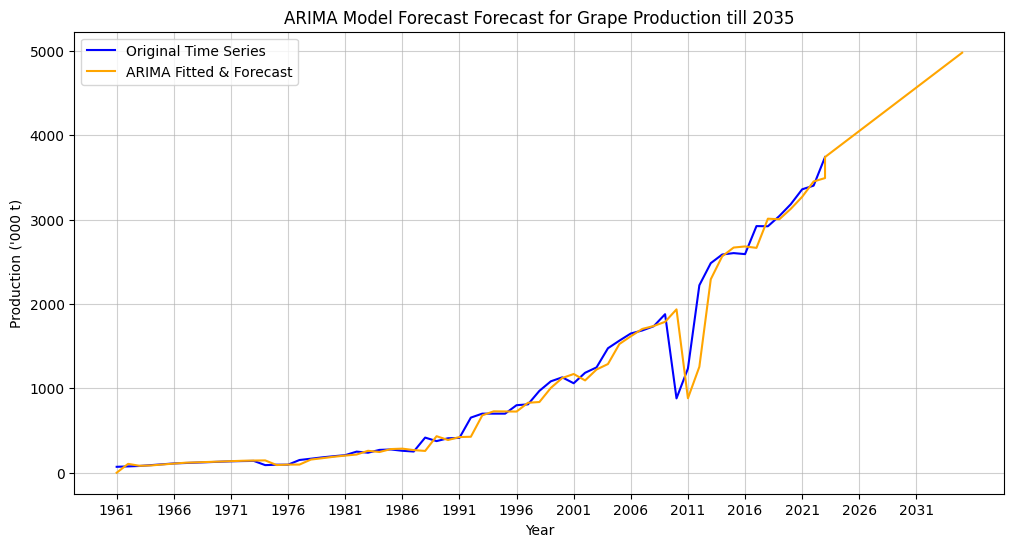

    Year  Forecasted Production
63  2024            3843.007092
64  2025            3946.014184
65  2026            4049.021277
66  2027            4152.028369
67  2028            4255.035461
68  2029            4358.042553
69  2030            4461.049646
70  2031            4564.056738
71  2032            4667.063830
72  2033            4770.070922
73  2034            4873.078014
74  2035            4976.085107


,Quantity(in '000t)
count,63.000000
mean,1015.114857
std,1067.831948
min,70.000000
25%,145.315000
50%,653.163000
75%,1607.150000
max,3740.000000


In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the dataset (adjust the file path as needed)
file_path = '/content/Grape.csv'
data = pd.read_csv(file_path)

data = data.sort_values('Year')  # Ensure the data is sorted by year
data.set_index('Year', inplace=True)

# Select the production column
time_series = data["Quantity(in '000t)"]

# Fit an ARIMA model
arima_model = ARIMA(time_series, order=(0, 2, 1))
arima_result = arima_model.fit()

# Forecast up to 2035
start_year = 2024
future_years = list(range(start_year, 2036))  # Forecast years from 2024 to 2035
forecast = arima_result.forecast(steps=len(future_years))  # Predict future values

# Ensure continuous connection by including only the last fitted value
last_actual_year = time_series.index[-1]
all_years = list(time_series.index) + [last_actual_year] + future_years
all_values = list(arima_result.fittedvalues) + [time_series.iloc[-1]] + list(forecast)

# Ensure x and y are the same length
if len(all_years) > len(all_values):
    all_years = all_years[:len(all_values)]
elif len(all_values) > len(all_years):
    all_values = all_values[:len(all_years)]
# Plot the original series, fitted values, and forecast
# Plot the original series, fitted values, and forecast with 10-year gaps
# Plot the original series, fitted values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Original Time Series', color='blue')
plt.plot(all_years, all_values, label='ARIMA Fitted & Forecast', linestyle='-', color='orange')

# Customizing the x-axis
plt.xticks(
    ticks=range(time_series.index.min(), 2036, 5),  # Tick every 10 years
    labels=range(time_series.index.min(), 2036, 5),
)
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Get the actual values and fitted values
actual = time_series  # Actual historical values
fitted = arima_result.fittedvalues  # Fitted values from ARIMA

# Calculate error metrics
mae = mean_absolute_error(actual, fitted)
rmse = np.sqrt(mean_squared_error(actual, fitted))
mape = np.mean(np.abs((actual - fitted) / actual)) * 100  # MAPE

# Print error values
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

plt.title('ARIMA Model Forecast Forecast for Grape Production till 2035')
plt.xlabel('Year')
plt.ylabel('Production (\'000 t)')
plt.legend()
plt.grid(True, linestyle='-', alpha=0.6)
plt.show()

# Print forecast values
forecast_df = pd.DataFrame({'Year': future_years, 'Forecasted Production': forecast})
print(forecast_df)
data.describe()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

Mean Absolute Error (MAE): 60.88
Root Mean Squared Error (RMSE): 89.36
Mean Absolute Percentage Error (MAPE): 8.64%


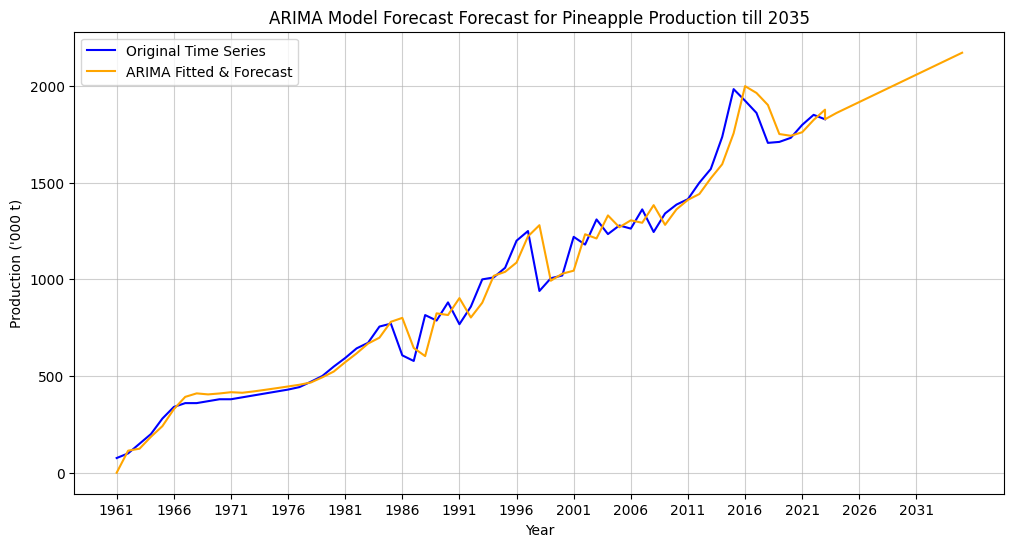

    Year  Forecasted Production
63  2024            1860.611492
64  2025            1888.944503
65  2026            1917.277513
66  2027            1945.610524
67  2028            1973.943534
68  2029            2002.276545
69  2030            2030.609555
70  2031            2058.942566
71  2032            2087.275576
72  2033            2115.608587
73  2034            2143.941597
74  2035            2172.274608


In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the dataset (adjust the file path as needed)
file_path = '/content/Pineapple.csv'
data = pd.read_csv(file_path)

data = data.sort_values('Year')  # Ensure the data is sorted by year
data.set_index('Year', inplace=True)

# Select the production column
time_series = data["Quantity(in '000t)"]

# Fit an ARIMA model
arima_model = ARIMA(time_series, order=(0, 2, 2))
arima_result = arima_model.fit()

# Forecast up to 2035
start_year = 2024
future_years = list(range(start_year, 2036))  # Forecast years from 2024 to 2035
forecast = arima_result.forecast(steps=len(future_years))  # Predict future values

# Ensure continuous connection by including only the last fitted value
last_actual_year = time_series.index[-1]
all_years = list(time_series.index) + [last_actual_year] + future_years
all_values = list(arima_result.fittedvalues) + [time_series.iloc[-1]] + list(forecast)

# Ensure x and y are the same length
if len(all_years) > len(all_values):
    all_years = all_years[:len(all_values)]
elif len(all_values) > len(all_years):
    all_values = all_values[:len(all_years)]
# Plot the original series, fitted values, and forecast
# Plot the original series, fitted values, and forecast with 10-year gaps
# Plot the original series, fitted values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Original Time Series', color='blue')
plt.plot(all_years, all_values, label='ARIMA Fitted & Forecast', linestyle='-', color='orange')

# Customizing the x-axis
plt.xticks(
    ticks=range(time_series.index.min(), 2036, 5),  # Tick every 10 years
    labels=range(time_series.index.min(), 2036, 5),
)
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Get the actual values and fitted values
actual = time_series  # Actual historical values
fitted = arima_result.fittedvalues  # Fitted values from ARIMA

# Calculate error metrics
mae = mean_absolute_error(actual, fitted)
rmse = np.sqrt(mean_squared_error(actual, fitted))
mape = np.mean(np.abs((actual - fitted) / actual)) * 100  # MAPE

# Print error values
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

plt.title('ARIMA Model Forecast Forecast for Pineapple Production till 2035')
plt.xlabel('Year')
plt.ylabel('Production (\'000 t)')
plt.legend()
plt.grid(True, linestyle='-', alpha=0.6)
plt.show()

# Print forecast values
forecast_df = pd.DataFrame({'Year': future_years, 'Forecasted Production': forecast})
print(forecast_df)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

Mean Absolute Error (MAE): 344.17
Root Mean Squared Error (RMSE): 755.89
Mean Absolute Percentage Error (MAPE): 19.29%


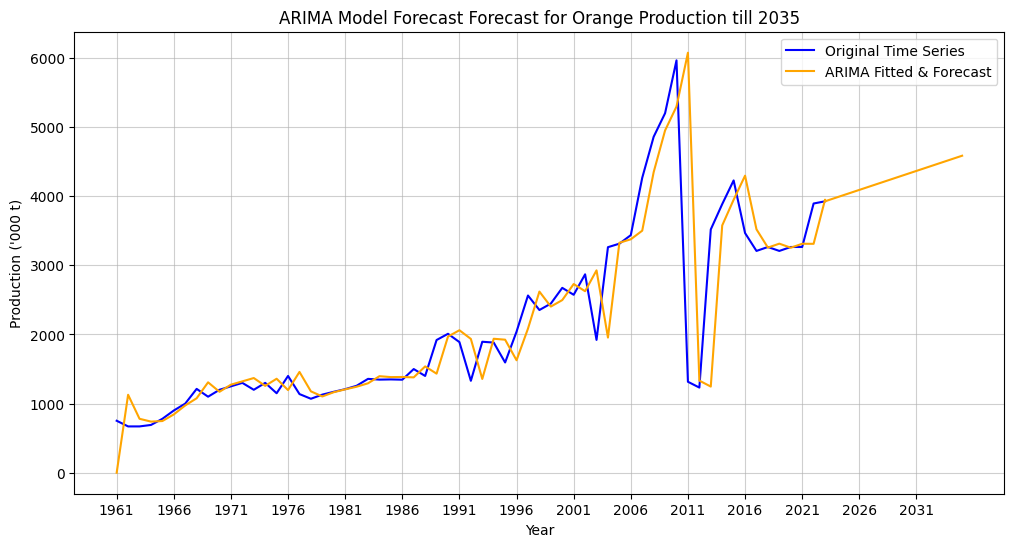

    Year  Forecasted Production
63  2024            3981.958928
64  2025            4036.917856
65  2026            4091.876784
66  2027            4146.835713
67  2028            4201.794641
68  2029            4256.753569
69  2030            4311.712497
70  2031            4366.671425
71  2032            4421.630353
72  2033            4476.589281
73  2034            4531.548209
74  2035            4586.507138


In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the dataset (adjust the file path as needed)
file_path = '/content/Orange.csv'
data = pd.read_csv(file_path)

data = data.sort_values('Year')  # Ensure the data is sorted by year
data.set_index('Year', inplace=True)

# Select the production column
time_series = data["Quantity(in '000t)"]

# Fit an ARIMA model
arima_model = ARIMA(time_series, order=(0, 2, 1))
arima_result = arima_model.fit()

# Forecast up to 2035
start_year = 2024
future_years = list(range(start_year, 2036))  # Forecast years from 2024 to 2035
forecast = arima_result.forecast(steps=len(future_years))  # Predict future values

# Ensure continuous connection by including only the last fitted value
last_actual_year = time_series.index[-1]
all_years = list(time_series.index) + [last_actual_year] + future_years
all_values = list(arima_result.fittedvalues) + [time_series.iloc[-1]] + list(forecast)

# Ensure x and y are the same length
if len(all_years) > len(all_values):
    all_years = all_years[:len(all_values)]
elif len(all_values) > len(all_years):
    all_values = all_values[:len(all_years)]
# Plot the original series, fitted values, and forecast
# Plot the original series, fitted values, and forecast with 10-year gaps
# Plot the original series, fitted values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Original Time Series', color='blue')
plt.plot(all_years, all_values, label='ARIMA Fitted & Forecast', linestyle='-', color='orange')

# Customizing the x-axis
plt.xticks(
    ticks=range(time_series.index.min(), 2036, 5),  # Tick every 10 years
    labels=range(time_series.index.min(), 2036, 5),
)
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Get the actual values and fitted values
actual = time_series  # Actual historical values
fitted = arima_result.fittedvalues  # Fitted values from ARIMA

# Calculate error metrics
mae = mean_absolute_error(actual, fitted)
rmse = np.sqrt(mean_squared_error(actual, fitted))
mape = np.mean(np.abs((actual - fitted) / actual)) * 100  # MAPE

# Print error values
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

plt.title('ARIMA Model Forecast Forecast for Orange Production till 2035')
plt.xlabel('Year')
plt.ylabel('Production (\'000 t)')
plt.legend()
plt.grid(True, linestyle='-', alpha=0.6)
plt.show()

# Print forecast values
forecast_df = pd.DataFrame({'Year': future_years, 'Forecasted Production': forecast})
print(forecast_df)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

Mean Absolute Error (MAE): 771.70
Root Mean Squared Error (RMSE): 1381.49
Mean Absolute Percentage Error (MAPE): 7.64%


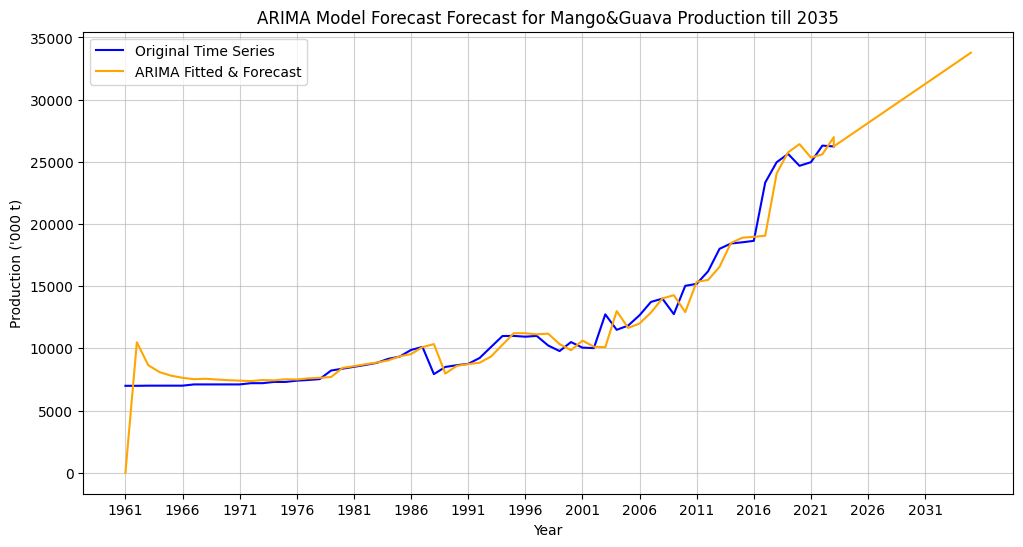

    Year  Forecasted Production
63  2024           26863.791555
64  2025           27491.583110
65  2026           28119.374664
66  2027           28747.166219
67  2028           29374.957774
68  2029           30002.749329
69  2030           30630.540883
70  2031           31258.332438
71  2032           31886.123993
72  2033           32513.915548
73  2034           33141.707103
74  2035           33769.498657


In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the dataset (adjust the file path as needed)
file_path = '/content/Mango_guava.csv'
data = pd.read_csv(file_path)

data = data.sort_values('Year')  # Ensure the data is sorted by year
data.set_index('Year', inplace=True)

# Select the production column
time_series = data["Quantity(in '000t)"]

# Fit an ARIMA model
arima_model = ARIMA(time_series, order=(0, 2, 1))
arima_result = arima_model.fit()

# Forecast up to 2035
start_year = 2024
future_years = list(range(start_year, 2036))  # Forecast years from 2024 to 2035
forecast = arima_result.forecast(steps=len(future_years))  # Predict future values

# Ensure continuous connection by including only the last fitted value
last_actual_year = time_series.index[-1]
all_years = list(time_series.index) + [last_actual_year] + future_years
all_values = list(arima_result.fittedvalues) + [time_series.iloc[-1]] + list(forecast)

# Ensure x and y are the same length
if len(all_years) > len(all_values):
    all_years = all_years[:len(all_values)]
elif len(all_values) > len(all_years):
    all_values = all_values[:len(all_years)]
# Plot the original series, fitted values, and forecast
# Plot the original series, fitted values, and forecast with 10-year gaps
# Plot the original series, fitted values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Original Time Series', color='blue')
plt.plot(all_years, all_values, label='ARIMA Fitted & Forecast', linestyle='-', color='orange')

# Customizing the x-axis
plt.xticks(
    ticks=range(time_series.index.min(), 2036, 5),  # Tick every 10 years
    labels=range(time_series.index.min(), 2036, 5),
)
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Get the actual values and fitted values
actual = time_series  # Actual historical values
fitted = arima_result.fittedvalues  # Fitted values from ARIMA

# Calculate error metrics
mae = mean_absolute_error(actual, fitted)
rmse = np.sqrt(mean_squared_error(actual, fitted))
mape = np.mean(np.abs((actual - fitted) / actual)) * 100  # MAPE

# Print error values
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

plt.title('ARIMA Model Forecast Forecast for Mango&Guava Production till 2035')
plt.xlabel('Year')
plt.ylabel('Production (\'000 t)')
plt.legend()
plt.grid(True, linestyle='-', alpha=0.6)
plt.show()

# Print forecast values
forecast_df = pd.DataFrame({'Year': future_years, 'Forecasted Production': forecast})
print(forecast_df)
